In [1]:
!pip install xgboost

In [14]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# import files

In [15]:
### import and read csv file

path = 'Output/full_indicators_by_country.csv'
df = pd.read_csv(path)


df

,country,iso3Code,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,Afghanistan,AFG,32.400000,91.555556,58.432353,2.681272,327.0,36.628111,0.000000,145.911664,...,0.012778,0.270084,3.220058,10.011889,7.579333,9.741222,11.616111,20.0,3.294,218.749241
1,Albania,ALB,81.455556,99.977778,42.382186,0.614119,1485.0,10.610444,78.238375,121.101852,...,4.822222,5.576404,17.127848,13.158667,10.648444,14.884000,12.600667,37.0,1.809,197.990096
2,Algeria,DZA,99.677778,99.655556,17.353871,2.628728,89.0,23.088556,0.000000,156.133146,...,0.574444,0.162233,0.736472,13.805556,8.501111,8.757778,12.170889,36.0,2.110,94.177289
3,American Samoa,ASM,0.000000,0.000000,14.150000,0.000000,0.0,11.422222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
4,Andorra,AND,100.000000,100.000000,39.983452,0.000000,0.0,6.466667,0.000000,0.000000,...,10.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Viet Nam,VNM,91.644444,99.744444,39.126963,0.943333,1821.0,15.627444,0.000000,163.357704,...,8.685556,5.370564,5.989108,3.482444,1.287222,2.345889,1.785333,41.0,1.802,43.300050
201,West Bank and Gaza,PSE,0.000000,99.977778,68.829501,0.000000,402.0,29.736444,0.000000,113.583340,...,0.000000,0.000000,0.000000,30.662889,22.519000,24.193444,25.038000,0.0,2.872,128.246720
202,"Yemen, Rep.",YEM,52.588889,72.344444,44.401176,0.503899,167.0,31.745667,0.000000,0.000000,...,0.036667,0.541611,15.049805,0.000000,0.000000,0.000000,17.822111,16.0,3.397,17.149918
203,Zambia,ZMB,11.211111,41.877778,32.038066,0.266775,1020.0,35.655000,65.282245,238.766830,...,3.721111,6.327273,14.786883,6.638556,6.436556,9.354556,5.490778,37.0,1.948,3.345682


## Inspect the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   country                                                                                               205 non-null    object 
 1   iso3Code                                                                                              205 non-null    object 
 2   clean fuels for cooking (% of population)                                                             205 non-null    float64
 3   Access to electricity (% of population)                                                               205 non-null    float64
 4   Agricultural land (% )                                                                                20

In [17]:
df.describe()

,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up (% of GNI per capita),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,61.962846,84.691220,36.671897,1.042124,1036.483415,19.102878,22.619633,290.649987,-0.050092,20.349919,...,4.774206,3.174055,9.184649,5.160941,6.598937,6.434298,6.684972,37.331707,1.688946,104.072191
std,40.820207,26.274639,22.639784,1.498041,841.862663,10.023666,38.024677,1213.808722,0.981774,35.240686,...,4.056715,5.087272,12.197218,4.856346,6.811326,5.508248,5.642046,22.760200,0.995349,311.586633
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.222222,0.000000,0.000000,-1.819292,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.477778,82.088889,17.948718,0.216659,327.000000,10.399222,0.000000,113.583340,-0.822062,1.277778,...,0.821111,0.000000,0.000000,2.131556,1.529778,2.645222,2.923333,23.000000,1.382000,3.485281
50%,82.744444,99.744444,38.527215,0.583351,847.000000,15.988889,0.000000,124.388549,-0.227720,8.222222,...,4.063333,1.192078,4.689504,4.000889,4.810333,5.309444,4.952000,36.000000,1.954000,23.178038
75%,100.000000,100.000000,52.479873,1.285107,1604.000000,26.925222,41.196827,159.192115,0.579324,22.288889,...,8.005556,4.488938,14.415027,6.926667,9.847778,9.132444,9.299556,53.000000,2.291000,67.018824
max,100.000000,100.000000,81.080429,13.679517,3240.000000,45.817111,209.829585,12920.702312,2.245200,225.555556,...,16.863333,35.286391,64.389653,30.662889,35.480000,30.466333,29.187111,90.000000,3.397000,3066.215540


In [18]:
df.columns

Index(['country', 'iso3Code', 'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of G

In [19]:
# Separate features and target variable
X = df.drop(columns=['immigration_100k', 'country','iso3Code'])
y = df['immigration_100k']


In [20]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Governmen

In [23]:
# Define transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Splitting the data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Training

### Import Machine Learning Models

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

##  Create a Pipelinefor Random Forest Regression and Train the Model

In [30]:
# Append regressor to the preprocessor pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Train the model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

### Model Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 98.74998046682497
RMSE: 161.6209676636075
R²: -0.6066211964471766


MAE (Mean Absolute Error: 98.75):
- This value represents the average absolute difference between the predicted and actual values. On average, your predictions are off by about 98.75 units. This gives a straightforward measure of the typical error magnitude without considering the direction of the error.

RMSE (Root Mean Squared Error: 161.62):
- RMSE is similar to MAE but penalizes larger errors more heavily because the errors are squared before averaging. An RMSE of 161.62 indicates that there are some larger errors in the predictions, which can be particularly problematic if outliers exist.

R² (Coefficient of Determination: -0.6066):
- R² measures the proportion of the variance in the dependent variable that is explained by the model. An R² of 1 means a perfect fit, 0 means the model does no better than simply predicting the mean of the observed data, and a negative R² indicates that the model performs worse than that baseline. Here, an R² of -0.6066 suggests that your model is performing very poorly—it explains none of the variability in the data and is even making predictions that are more erroneous than if you had just used the average value for every prediction.

In summary:
- These results suggest that the model is not a good fit for the data. The relatively high MAE and RMSE indicate large prediction errors, and the negative R² confirms that the model is performing worse than a simple mean-based prediction. This is a clear signal to reassess your model's design, feature selection, or possibly the data itself.




### Feature Importance Analysis
Understanding feature importance can provide insights into which indicators most influence immigration rates.

In [38]:
# Fit the model before extracting feature importances
best_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central gover...
       'Unemployment intermediate education',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Corruption index 2023', 'Global_Peace_Index_2023'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [49]:
from sklearn.utils.validation import check_is_fitted

# Ensure the preprocessor is fitted before accessing feature names
preprocessor = best_model.named_steps['preprocessor']
onehot_encoder = preprocessor.transformers_[1][1]  # Access OneHotEncoder

# Check if the OneHotEncoder is fitted before calling get_feature_names_out()
try:
    check_is_fitted(onehot_encoder)
    categorical_features = list(onehot_encoder.get_feature_names_out(categorical_cols))
except:
    categorical_features = categorical_cols.tolist()  # Fallback if encoder isn't fitted

# Extract feature importances
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importances = best_model.named_steps['regressor'].feature_importances_
    feature_names = numerical_cols.tolist() + categorical_features  # Combine numerical & categorical features
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)

    print(feature_importances.head(10))


                                              feature  importance
3                        Armed forces (% labor force)    0.187471
45  Unemployment, total (% of total labor force) (...    0.148571
13  Debt service (PPG and IMF only, % of exports o...    0.090333
0           clean fuels for cooking (% of population)    0.042710
10                 Current account balance (% of GDP)    0.038850
21             government  consumption exp (% of GDP)    0.036409
29                                 Population density    0.034934
33                                  Population, total    0.027515
40                      Total debt service (% of GNI)    0.025725
18                 GDP per capita (constant 2015 US$)    0.025657


### Visualization

### Plotting feature importances

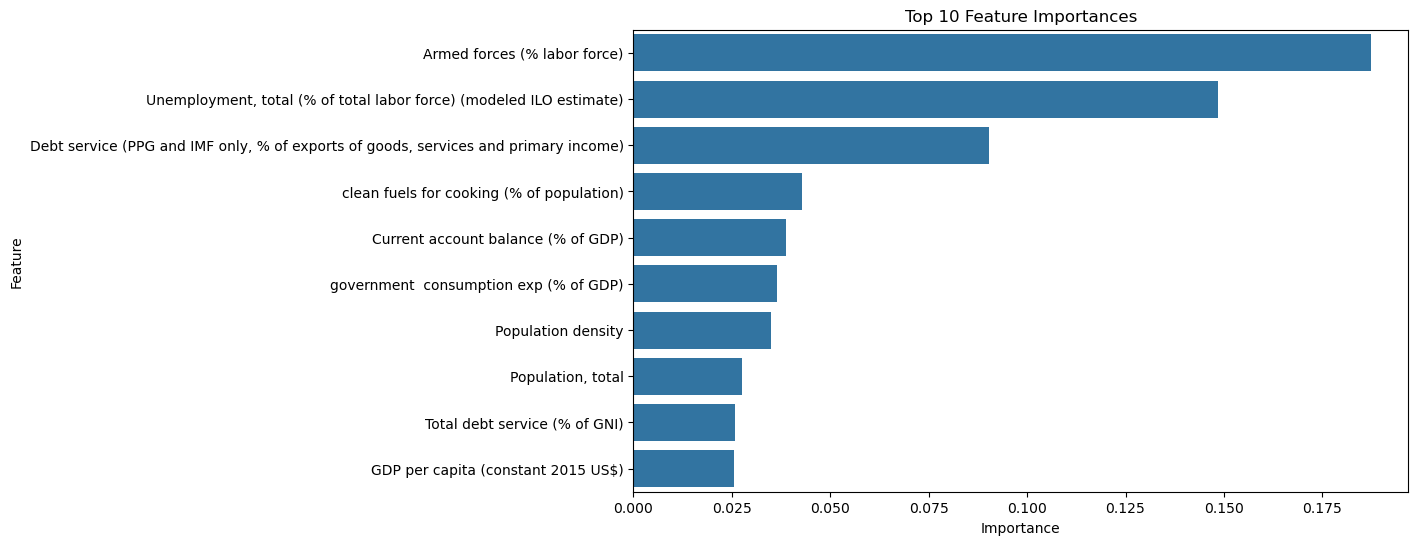

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 features
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Actual vs Predicted Values

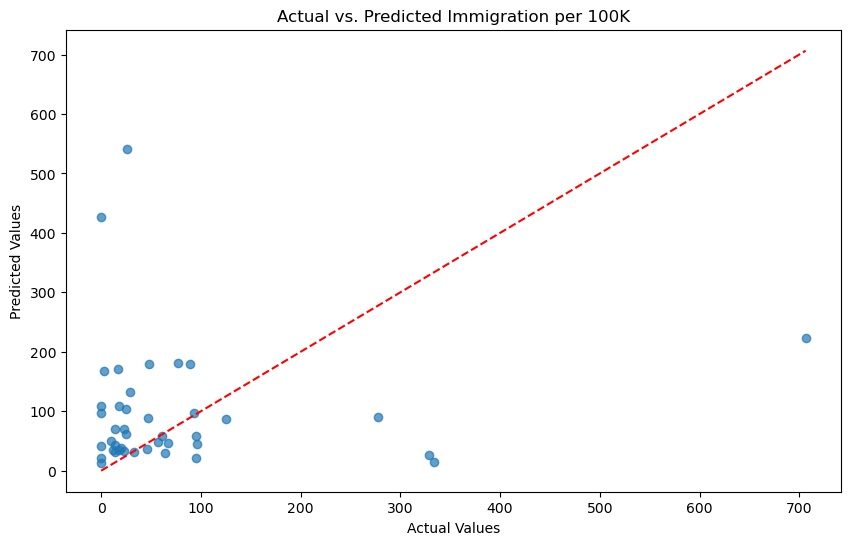

In [51]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test,y_test, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Saving the model

In [52]:
import joblib

# Save the model
joblib.dump(best_model, 'immigration_predictor_model.pkl')

['immigration_predictor_model.pkl']

Loading and using the model

In [53]:
# Load the model
loaded_model = joblib.load('immigration_predictor_model.pkl')

# Example: Predict on new data
# new_data should be a DataFrame with the same structure as X
# new_predictions = loaded_model.predict(new_data)

##  Create a Pipeline for XGBoost  Regression and Train the Model

In [54]:
# Define XGBoost Pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42))
])

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regression Results:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R²: {r2_xgb}")


XGBoost Regression Results:
MAE: 84.77720057520894
RMSE: 170.25159104114186
R²: -0.7827910511266678


In [ ]:
MAE: 98.74998046682497
RMSE: 161.6209676636075
R²: -0.6066211964471766

### Hyperparameter Tuning for XGBoost


In [55]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for XGBoost
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_xgb_model = grid_search.best_estimator_

# Predict with best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate Best XGBoost Model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("\nBest XGBoost Regression Results:")
print(f"MAE: {mae_best_xgb}")
print(f"RMSE: {rmse_best_xgb}")
print(f"R²: {r2_best_xgb}")
print(f"Best Parameters: {grid_search.best_params_}")



Best XGBoost Regression Results:
MAE: 94.66685969597263
RMSE: 198.66919481220734
R²: -1.4276112997335626
Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 3, 'regressor__n_estimators': 300}


### Feature Importance Analysis

In [56]:
# Extract feature importance from Random Forest
if hasattr(rf_model.named_steps['regressor'], 'feature_importances_'):
    importances_rf = rf_model.named_steps['regressor'].feature_importances_
    feature_names = numerical_cols.tolist() + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols))
    feature_importance_rf = pd.DataFrame({'feature': feature_names, 'importance': importances_rf}).sort_values(by='importance', ascending=False)

    print("\nTop 10 Features (Random Forest):")
    print(feature_importance_rf.head(10))

# Extract feature importance from XGBoost
if hasattr(xgb_model.named_steps['regressor'], 'feature_importances_'):
    importances_xgb = xgb_model.named_steps['regressor'].feature_importances_
    feature_importance_xgb = pd.DataFrame({'feature': feature_names, 'importance': importances_xgb}).sort_values(by='importance', ascending=False)

    print("\nTop 10 Features (XGBoost):")
    print(feature_importance_xgb.head(10))


Top 10 Features (XGBoost):
                                              feature  importance
45  Unemployment, total (% of total labor force) (...    0.273867
3                        Armed forces (% labor force)    0.146150
13  Debt service (PPG and IMF only, % of exports o...    0.114611
0           clean fuels for cooking (% of population)    0.113916
40                      Total debt service (% of GNI)    0.045940
10                 Current account balance (% of GDP)    0.045940
23                                Human Capital Index    0.044566
21             government  consumption exp (% of GDP)    0.036280
26                              Level of water stress    0.035412
7                   Consumer price index (2010 = 100)    0.022391


In [ ]:
                                             feature  importance
3                        Armed forces (% labor force)    0.187471
45  Unemployment, total (% of total labor force) (...    0.148571
13  Debt service (PPG and IMF only, % of exports o...    0.090333
0           clean fuels for cooking (% of population)    0.042710
10                 Current account balance (% of GDP)    0.038850
21             government  consumption exp (% of GDP)    0.036409
29                                 Population density    0.034934
33                                  Population, total    0.027515
40                      Total debt service (% of GNI)    0.025725
18                 GDP per capita (constant 2015 US$)    0.025657

### Save the Best Model

In [57]:
import joblib

# Save best model
joblib.dump(best_xgb_model, 'best_xgboost_immigration_model.pkl')

# Load model for future use
loaded_model = joblib.load('best_xgboost_immigration_model.pkl')


### Visualizing the Best Model (XGBoost)

### Load the best model and compute residuals

In [58]:
# Load the best model

best_xgb_model = joblib.load('best_xgboost_immigration_model.pkl')

# Predict on test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred_best_xgb

### Feature Importance Plot

Ensure Model is Fitted

In [60]:
# Fit the best model if not already trained
if not hasattr(best_xgb_model.named_steps['regressor'], 'feature_importances_'):
    best_xgb_model.fit(X_train, y_train)  # Ensure the model is trained before extracting features


Extract Feature Names correctly

In [66]:
from sklearn.utils.validation import check_is_fitted

# Get the fitted preprocessor from the pipeline
preprocessor = best_xgb_model.named_steps['preprocessor']

# Ensure the preprocessor (including the SimpleImputer and OneHotEncoder) is fitted
check_is_fitted(preprocessor)

# Extract feature names from OneHotEncoder
try:
    onehot_encoder = preprocessor.transformers_[1][1]  # Access OneHotEncoder
    check_is_fitted(onehot_encoder)  # Ensure OneHotEncoder is fitted
    categorical_features = list(onehot_encoder.get_feature_names_out(categorical_cols))
except:
    categorical_features = categorical_cols.tolist()  # Fallback if OneHotEncoder isn't fitted

# Extract feature importances from XGBoost
if hasattr(best_xgb_model.named_steps['regressor'], 'feature_importances_'):
    importances_xgb = best_xgb_model.named_steps['regressor'].feature_importances_
    feature_names = numerical_cols.tolist() + categorical_features  # Combine numerical & categorical features

    # Create DataFrame of feature importances
    feature_importance_xgb = pd.DataFrame({'feature': feature_names, 'importance': importances_xgb})
    feature_importance_xgb = feature_importance_xgb.sort_values(by='importance', ascending=False)

    print("\nTop 10 Features (XGBoost):")
    print(feature_importance_xgb.head(10))



Top 10 Features (XGBoost):
                                              feature  importance
45  Unemployment, total (% of total labor force) (...    0.213653
3                        Armed forces (% labor force)    0.167485
0           clean fuels for cooking (% of population)    0.128197
13  Debt service (PPG and IMF only, % of exports o...    0.120348
21             government  consumption exp (% of GDP)    0.073888
29                                 Population density    0.041681
10                 Current account balance (% of GDP)    0.040231
40                      Total debt service (% of GNI)    0.031146
26                              Level of water stress    0.029437
39  Total alcohol consumption per capita (liters o...    0.028938


### Feature Importance Plot

 ### Fit Preprocessing Pipeline First

In [ ]:
# Fit the preprocessor on training data
X_train_transformed = preprocessor.fit_transform(X_train)


In [69]:
from sklearn.utils.validation import check_is_fitted

# Ensure preprocessor is fitted
check_is_fitted(preprocessor)

# Extract feature names from OneHotEncoder
try:
    onehot_encoder = preprocessor.transformers_[1][1]  # Access OneHotEncoder
    check_is_fitted(onehot_encoder)  # Ensure OneHotEncoder is fitted
    categorical_features = list(onehot_encoder.get_feature_names_out(categorical_cols))
except:
    categorical_features = categorical_cols.tolist()  # Fallback if OneHotEncoder isn't fitted

# Combine numerical & categorical feature names
feature_names = numerical_cols.tolist() + categorical_features

print("Feature Names Extracted Successfully:", feature_names[:10])  # Display first 10 feature names

Feature Names Extracted Successfully: ['clean fuels for cooking (% of population)', 'Access to electricity (% of population)', 'Agricultural land (% )', 'Armed forces (% labor force)', 'precipitation (mm per year)', 'Birth rate, crude (per 1,000 people)', 'Central government debt, total (% of GDP)', 'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate', 'Cost of business start-up (% of GNI per capita)']


In [70]:
# Fit the model (ensures pipeline is fully trained)
best_xgb_model.fit(X_train, y_train)

# Extract feature importances from XGBoost
if hasattr(best_xgb_model.named_steps['regressor'], 'feature_importances_'):
    importances_xgb = best_xgb_model.named_steps['regressor'].feature_importances_
    
    # Create DataFrame of feature importances
    feature_importance_xgb = pd.DataFrame({'feature': feature_names, 'importance': importances_xgb})
    feature_importance_xgb = feature_importance_xgb.sort_values(by='importance', ascending=False)

    print("\nTop 10 Important Features (XGBoost):")
    print(feature_importance_xgb.head(10))



Top 10 Important Features (XGBoost):
                                              feature  importance
45  Unemployment, total (% of total labor force) (...    0.213653
3                        Armed forces (% labor force)    0.167485
0           clean fuels for cooking (% of population)    0.128197
13  Debt service (PPG and IMF only, % of exports o...    0.120348
21             government  consumption exp (% of GDP)    0.073888
29                                 Population density    0.041681
10                 Current account balance (% of GDP)    0.040231
40                      Total debt service (% of GNI)    0.031146
26                              Level of water stress    0.029437
39  Total alcohol consumption per capita (liters o...    0.028938
